<a href="https://colab.research.google.com/github/mail2prashant99/mail2prashant99/blob/main/ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('osint_shadowline_dataset.csv')

In [4]:
df.head(1)

,post_id,account_age_days,follower_count,following_count,text_length,url_count,hashtag_count,mention_count,sentiment_score,post_hour,...,language,client_app,has_geo,link_domain_category,topic,contains_ip,contains_email,shared_domain_reputation,label_bot,label_malicious
0,1,326,206,301,191,0,2,0,-0.196247,15,...,en,Android,0,shopping,elections,0,0,0.638622,0,0


In [5]:
df.columns.to_list()

['post_id',
 'account_age_days',
 'follower_count',
 'following_count',
 'text_length',
 'url_count',
 'hashtag_count',
 'mention_count',
 'sentiment_score',
 'post_hour',
 'day_of_week',
 'country',
 'language',
 'client_app',
 'has_geo',
 'link_domain_category',
 'topic',
 'contains_ip',
 'contains_email',
 'shared_domain_reputation',
 'label_bot',
 'label_malicious']

In [6]:
df.isna().sum()

,0
post_id,0
account_age_days,0
follower_count,0
following_count,0
text_length,0
url_count,0
hashtag_count,0
mention_count,0
sentiment_score,0
post_hour,0


array([[<Axes: title={'center': 'post_id'}>,
        <Axes: title={'center': 'account_age_days'}>,
        <Axes: title={'center': 'follower_count'}>,
        <Axes: title={'center': 'following_count'}>],
       [<Axes: title={'center': 'text_length'}>,
        <Axes: title={'center': 'url_count'}>,
        <Axes: title={'center': 'hashtag_count'}>,
        <Axes: title={'center': 'mention_count'}>],
       [<Axes: title={'center': 'sentiment_score'}>,
        <Axes: title={'center': 'post_hour'}>,
        <Axes: title={'center': 'day_of_week'}>,
        <Axes: title={'center': 'has_geo'}>],
       [<Axes: title={'center': 'contains_ip'}>,
        <Axes: title={'center': 'contains_email'}>,
        <Axes: title={'center': 'shared_domain_reputation'}>,
        <Axes: title={'center': 'label_bot'}>],
       [<Axes: title={'center': 'label_malicious'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

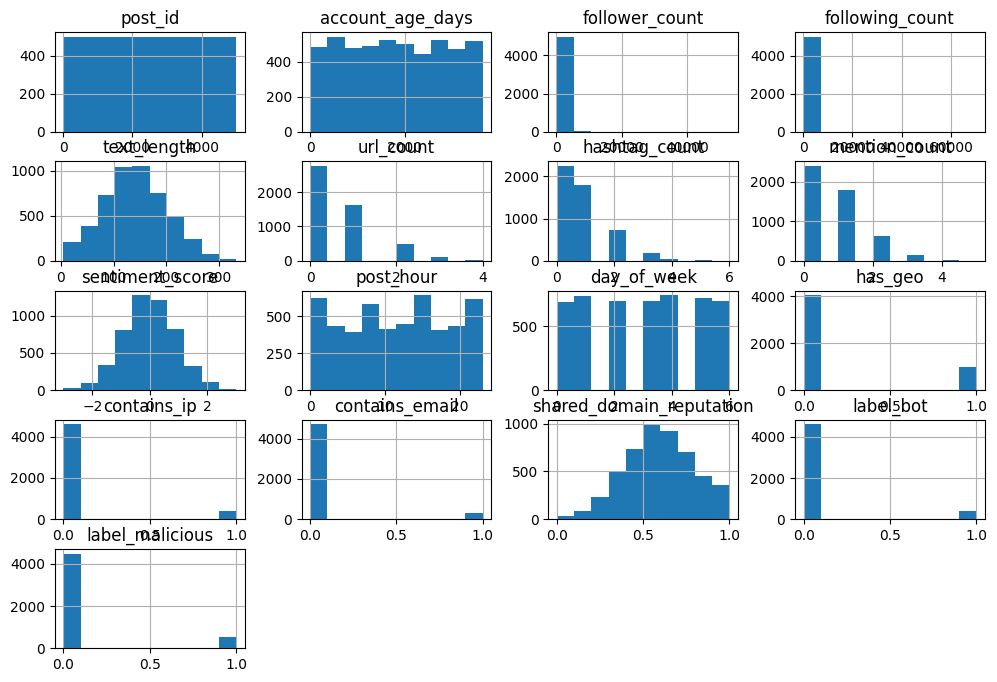

In [13]:
df.hist(figsize = (12,8))

In [9]:
df.columns

Index(['post_id', 'account_age_days', 'follower_count', 'following_count',
       'text_length', 'url_count', 'hashtag_count', 'mention_count',
       'sentiment_score', 'post_hour', 'day_of_week', 'country', 'language',
       'client_app', 'has_geo', 'link_domain_category', 'topic', 'contains_ip',
       'contains_email', 'shared_domain_reputation', 'label_bot',
       'label_malicious'],
      dtype='object')

In [11]:
X = df[['post_id', 'account_age_days', 'follower_count', 'following_count',
       'text_length', 'url_count', 'hashtag_count', 'mention_count',
       'sentiment_score', 'post_hour', 'day_of_week', 'country', 'language',
       'client_app', 'has_geo', 'link_domain_category', 'topic', 'contains_ip',
       'contains_email', 'shared_domain_reputation']]

In [12]:
y = df['label_malicious']

In [14]:
from sklearn.compose import make_column_selector as selector

In [17]:
num_selector = selector(dtype_include = np.number)
cat_selector = selector(dtype_include = ['category', 'bool', 'object'])
num_features = num_selector(X)
cat_features = cat_selector(X)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [25]:
numerical_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])
categorical_pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = "most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state = 42
)

In [28]:
preproc = ColumnTransformer(transformers = [
    ('num', numerical_pipe, num_features),
    ('cat', categorical_pipe, cat_features
     )
])

In [30]:
from sklearn.linear_model import LogisticRegression
ridge_lr = LogisticRegression(
    penalty = 'l2',
    solver = 'lbfgs',
    max_iter = 20000
)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [32]:
cv = StratifiedKFold(
    n_splits = 5,
    shuffle = True,
    random_state = 99
)


In [34]:
param_grid = {"model__C": np.logspace(-1, 1, 10)}

In [36]:
scoring = {
    "accuracy":"accuracy",
    "precision":"precision",
    "f1":'f1'
}

In [37]:
ridge_pipe = Pipeline([
    ('preproc', preproc),
    ('model', ridge_lr)
])

In [38]:
grid = GridSearchCV(
    estimator = ridge_pipe,
    param_grid = param_grid,
    scoring = scoring,
    refit = 'f1',
    cv=cv,
    n_jobs = -1,
    return_train_score = False
)

In [39]:
grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['post_id',
                                                                          'account_age_days',
                                                                          'follower_count',
                                                                          'following_count',
                                                                          'text_length',
                                                                          'url_count',
                                                                          'hashtag_count',
                                                                          'me...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['country',
                                                                          'language',
                                                                          'client_app',
                                                                          'link_domain_category',
                                                                          'topic'])])),
                                       ('model',
                                        LogisticRegression(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'model__C': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision'})

In [40]:
grid.best_params_

{'model__C': np.float64(0.1)}

In [43]:
best_C = grid.best_params_["model__C"]
best_i = grid.best_index_

In [52]:
cr = grid.cv_results_
mean_acc = cr['mean_test_accuracy'][best_i]
std_acc = cr['std_test_accuracy'][best_i]
print("accuracy:", (mean_acc, std_acc))


mean_prec = cr['mean_test_precision'][best_i]
std_prec = cr['std_test_precision'][best_i]
print("Precision:",(mean_prec, std_prec) )

mean_f1 = cr['mean_test_f1'][best_i]
std_f1 = cr['std_test_f1'][best_i]
print('f1 score:', (mean_f1, std_f1))

accuracy: (np.float64(0.8944000000000001), np.float64(0.0008000000000000007))
Precision: (np.float64(0.0), np.float64(0.0))
f1 score: (np.float64(0.0), np.float64(0.0))


In [50]:
grid.cv_results_

{'mean_fit_time': array([0.08018994, 0.07347031, 0.07485371, 0.08074856, 0.08122911,
        0.0789114 , 0.0728148 , 0.06942139, 0.07141738, 0.06668997]),
 'std_fit_time': array([0.01480225, 0.00200701, 0.00207301, 0.00803802, 0.00360094,
        0.00761658, 0.00495153, 0.00288806, 0.00185968, 0.00374641]),
 'mean_score_time': array([0.02573009, 0.02574925, 0.02631559, 0.02673478, 0.02790294,
        0.02559133, 0.02819157, 0.02503281, 0.02581382, 0.02348289]),
 'std_score_time': array([0.00073294, 0.00146685, 0.00150274, 0.0012949 , 0.00224109,
        0.00133952, 0.00486963, 0.00087638, 0.00175132, 0.0037122 ]),
 'param_model__C': masked_array(data=[0.1, 0.16681005372000587, 0.2782559402207124,
                    0.46415888336127786, 0.774263682681127,
                    1.291549665014884, 2.1544346900318834,
                    3.593813663804626, 5.994842503189409, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],